In [1]:
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('data/MissingMigrants-Global-2019-12-31_correct.csv.zip', compression='zip')
df.head(10)

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,52673,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,11.0,NaN,NaN,NaN,Hypothermia,Unspecififed location off the coast of Algeria,El Watan,"35.568972356329, -1.289773129748",Western Mediterranean,https://bit.ly/2FqQHo4,Uncategorized,1
1,52666,Mediterranean,"December 30, 2019",2019,Dec,1.0,NaN,1,NaN,NaN,1.0,NaN,Presumed drowning,"Recoverd on Calamorcarro Beach, Ceuta",El Foro de Ceuta,"35.912383552874, -5.357673338898",Western Mediterranean,https://bit.ly/39yKRyF,Uncategorized,1
2,52663,East Asia,"December 27, 2019",2019,Dec,5.0,NaN,5,NaN,NaN,3.0,NaN,Unknown,"Bodies found on boat near Sado Island, Niigata...","Japan Times, Kyodo News, AFP","38.154018233313, 138.086032653130",NaN,"http://bit.ly/2sCnBz1, http://bit.ly/2sEra83, ...",Eastern Asia,3
3,52662,Middle East,"December 26, 2019",2019,Dec,7.0,NaN,7,64.0,NaN,NaN,NaN,Drowning,"Van lake near Adilcevaz, Bitlis, Turkey","EFE, BBC, ARYnews","38.777228612085, 42.739257582031",NaN,"http://bit.ly/2ZG2Y19, http://bit.ly/2MLamDf, ...",Western Asia,3
4,52661,Middle East,"December 24, 2019",2019,Dec,12.0,NaN,12,NaN,NaN,NaN,NaN,Air strike,"Al-Raqw market in Saada, Yemen","UN Humanitarian Coordinator in Yemen, Qatar Tr...","17.245364805636, 43.239093360326",NaN,"http://bit.ly/2FjolvD, http://bit.ly/2sD42GR, ...",Western Asia,4
5,52660,Europe,"December 23, 2019",2019,Dec,2.0,4.0,6,9.0,3.0,3.0,2.0,Drowning,"Danube River near Karavukovo, Serbia, near bor...",IOM Serbia,"45.492211859695, 19.093471134766",Western Balkans,http://bit.ly/2Qzo6Sx,Southern Europe,4
6,52674,Europe,"December 22, 2019",2019,Dec,1.0,NaN,1,NaN,1.0,NaN,NaN,Unknown,"Between Kirki and Alexandroupolis, Evros Regio...",Eidiseis,"40.906817440243, 25.840116946924",NaN,https://bit.ly/37uUxIx,Southern Europe,1
7,52664,US-Mexico Border,"December 20, 2019",2019,Dec,83.0,NaN,83,NaN,NaN,NaN,NaN,Mixed,Cumulative total 1 Jan - 20 Dec 2019 for Webb ...,Webb County Medical Examiner’s Office,"27.531364500000, -99.428485200000",Central America to US,NaN,Northern America,5
8,52667,Mediterranean,"December 18, 2019",2019,Dec,4.0,NaN,4,NaN,3.0,1.0,1.0,Presumed drowning,"Recovered on beach in Driouch region, Morocco",Nador City,"35.187732269556, -3.375644698242",Western Mediterranean,https://bit.ly/2trQPAG,Uncategorized,1
9,52675,Europe,"December 18, 2019",2019,Dec,1.0,NaN,1,NaN,NaN,1.0,NaN,Drowning,"Isonzo river, between Gradisca and Sagrado, Italy",il Giornale,"45.881492295409, 13.494343026794",NaN,https://bit.ly/39COseW,Southern Europe,1


Check the number of missing values by column and by row.

In [3]:
print(f'Columns with at least one nan value: {df.isna().any(0).sum()}')
print(f'Rows  with at least one nan value: {df.isna().any(1).sum()}')

Columns with at least one nan value: 12
Rows  with at least one nan value: 5954


Plot nullity matrix.

<AxesSubplot:>

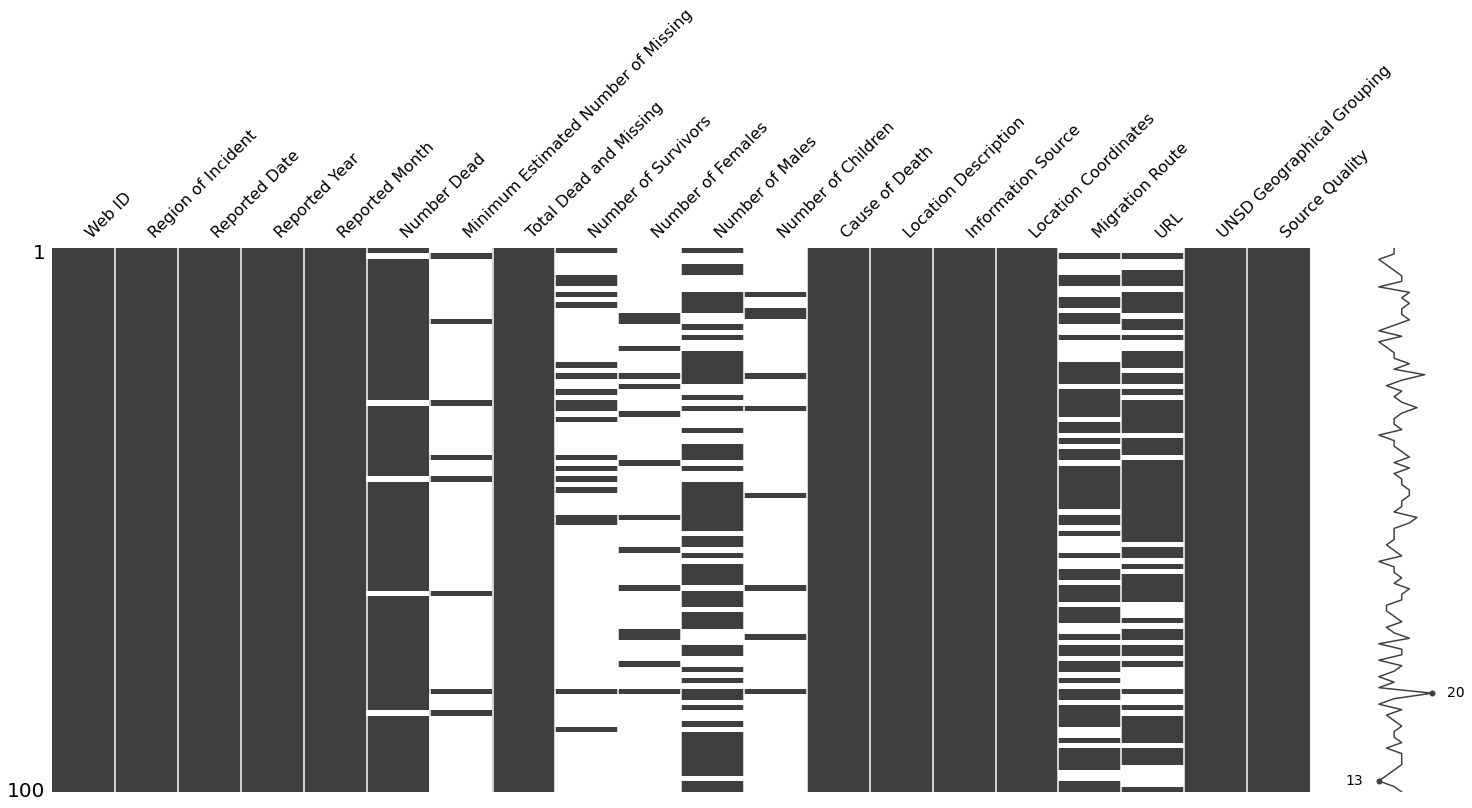

In [4]:
msno.matrix(df.sample(100))

Visualize nullity by column.

<AxesSubplot:>

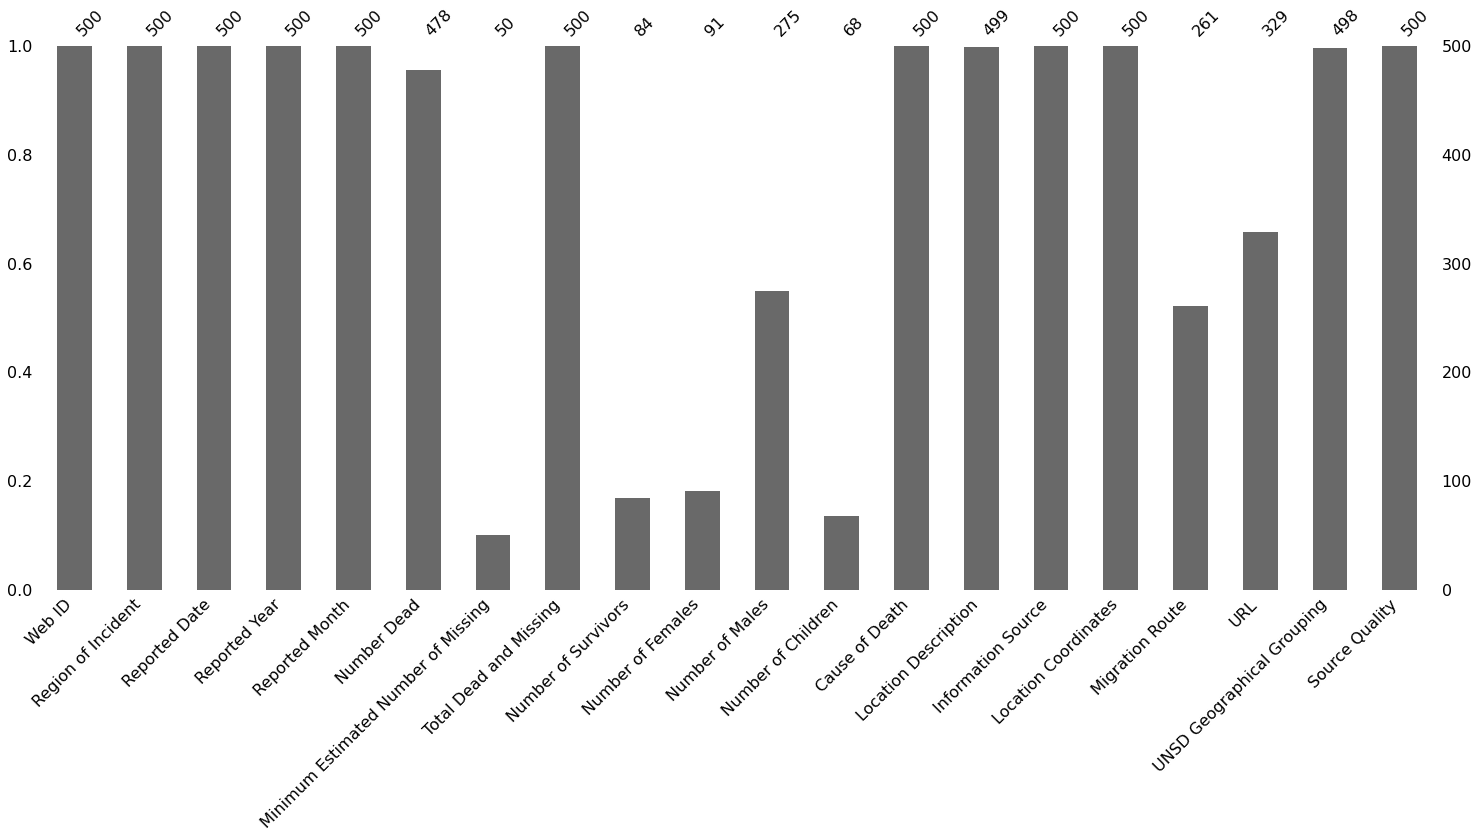

In [5]:
msno.bar(df.sample(500))

Heatmap for nullity correlation. (How strongly the presence or absence of one variable affects the presence of another?)

<AxesSubplot:>

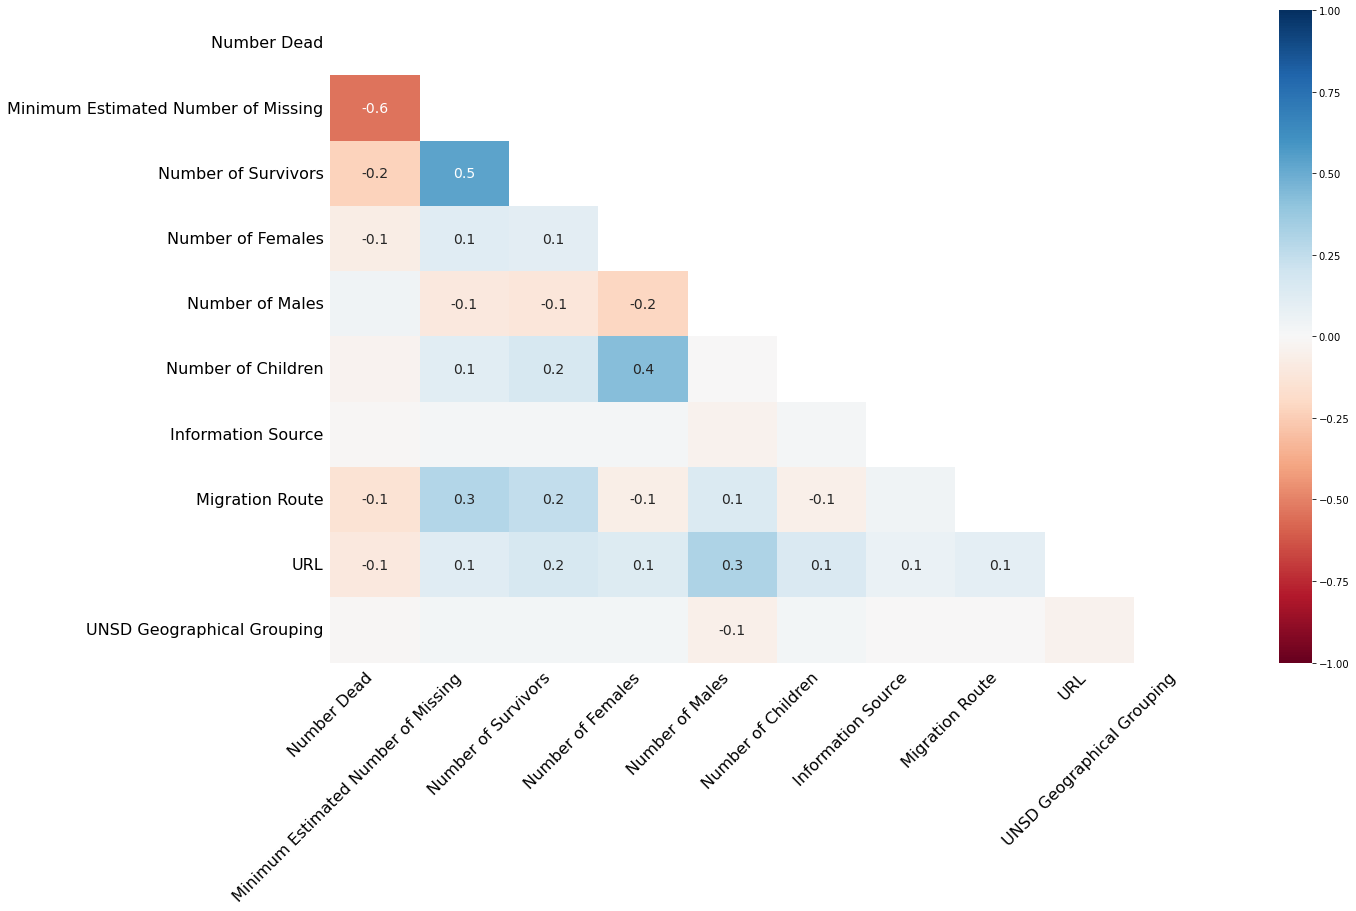

In [6]:
msno.heatmap(df.sample(500))

Dendropgram: To interpret this graph, read it from a top-down perspective. Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty, and so on. In this specific example the dendrogram glues together the variables which are required and therefore present in every record.

<AxesSubplot:>

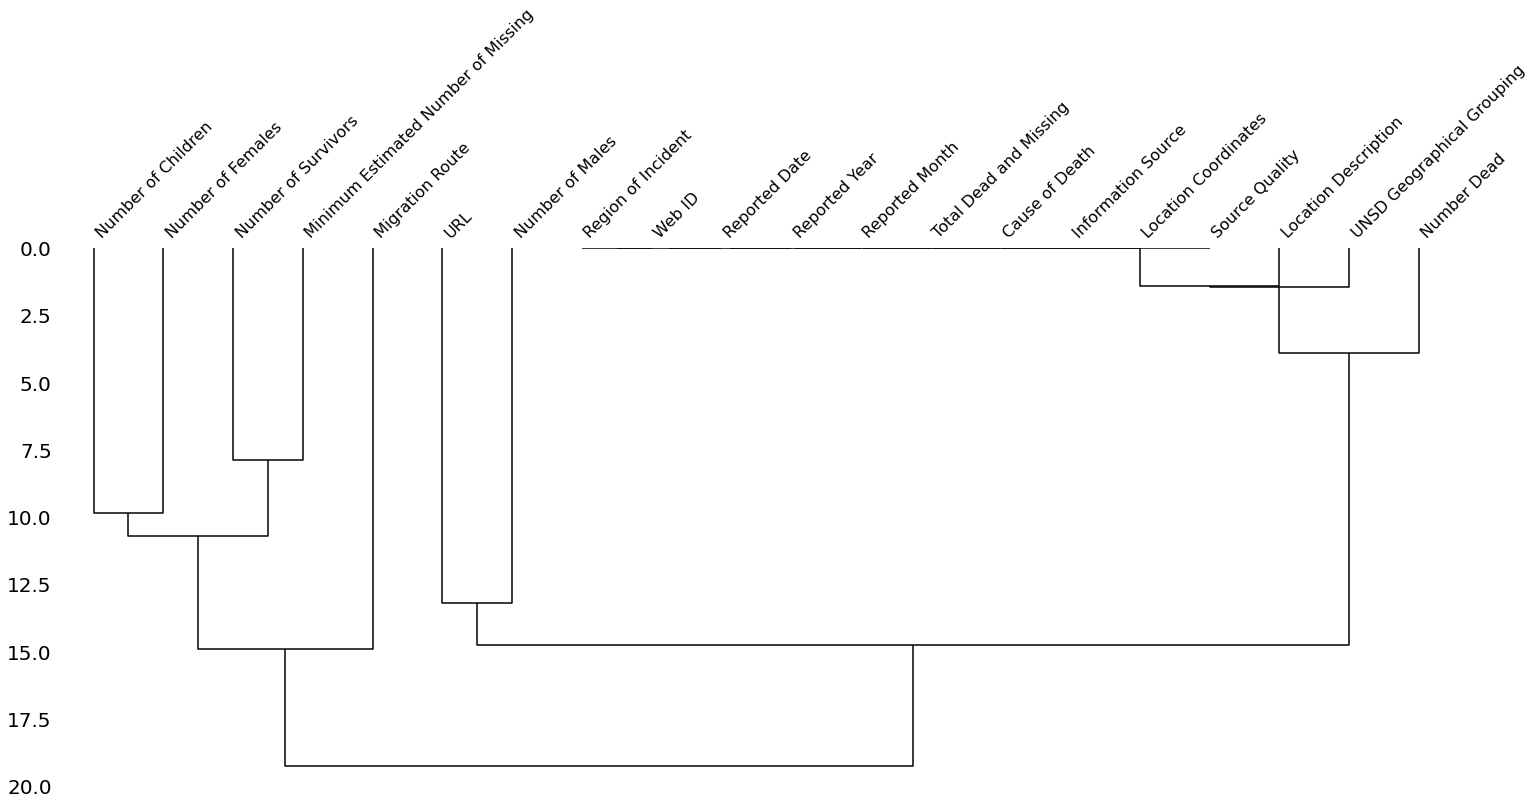

In [7]:
msno.dendrogram(df.sample(500))

NaN bars with seaborn.

Text(0.5, 0, 'ratio of nans')

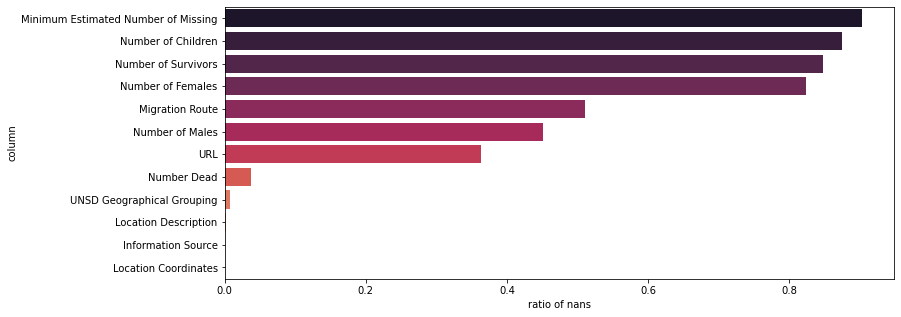

In [8]:
g = df[df.columns[df.isna().any(0)]].isna().sum().sort_values(ascending=False) / df.shape[0]
g = g.reset_index().rename(columns={'index': 'column', 0: 'nans'})
sns.barplot(x='nans', y='column', data=g, ax=plt.subplots(1,1,figsize=(12,5))[1], palette='rocket')
plt.xlabel('ratio of nans')

In [9]:
def get_data():
    return pd.DataFrame(
        data={
            'A': [1, 2, 3, np.nan, np.nan, 6],
            'B': [1, -1, 1, -1, 1, np.nan],
            'C': [1, 2, np.nan, 8, 16, 32],
            'D': ['male', 'female', 'male', 'female', None, 'male'],            
            'E': ['red', 'blue', 'red', 'green', None, 'yellow'],}
        
    )

df = get_data()
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,NaN,male,red
3,NaN,-1.0,8.0,female,green
4,NaN,1.0,16.0,None,None
5,6.0,NaN,32.0,male,yellow


Dealing with NA: Drop Na

In [10]:
df = get_data()
df = df.dropna(axis=0)
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue


Dealing with NA: fill with mean

In [11]:
df = get_data()
for c in df.select_dtypes('number'):
    df[c] = df[c].fillna(df[c].mean())
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,11.8,male,red
3,3.0,-1.0,8.0,female,green
4,3.0,1.0,16.0,None,None
5,6.0,0.2,32.0,male,yellow


Dealing with NA: fill with median

In [12]:
df = get_data()
for c in df.select_dtypes('number'):
    df[c] = df[c].fillna(df[c].median())
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,8.0,male,red
3,2.5,-1.0,8.0,female,green
4,2.5,1.0,16.0,None,None
5,6.0,1.0,32.0,male,yellow


In [13]:
df = get_data()
temp = df.reset_index()
temp

,index,A,B,C,D,E
0,0,1.0,1.0,1.0,male,red
1,1,2.0,-1.0,2.0,female,blue
2,2,3.0,1.0,NaN,male,red
3,3,NaN,-1.0,8.0,female,green
4,4,NaN,1.0,16.0,None,None
5,5,6.0,NaN,32.0,male,yellow


Create a feature mapped from another feature.

In [14]:
male_ohe = {'male': 1, 'female': 0, None: None}
temp['is_male'] = temp['D'].apply(lambda x: male_ohe[x]).astype(float)
temp

,index,A,B,C,D,E,is_male
0,0,1.0,1.0,1.0,male,red,1.0
1,1,2.0,-1.0,2.0,female,blue,0.0
2,2,3.0,1.0,NaN,male,red,1.0
3,3,NaN,-1.0,8.0,female,green,0.0
4,4,NaN,1.0,16.0,None,None,NaN
5,5,6.0,NaN,32.0,male,yellow,1.0


Select rows by the index of another data frame using `isin`

In [15]:
temp = temp.set_index('index')
df.loc[df.index.isin(temp.index), 'D'] = temp.D
df

,A,B,C,D,E
0,1.0,1.0,1.0,male,red
1,2.0,-1.0,2.0,female,blue
2,3.0,1.0,NaN,male,red
3,NaN,-1.0,8.0,female,green
4,NaN,1.0,16.0,None,None
5,6.0,NaN,32.0,male,yellow
